# Pymaceuticals Inc.
---

### Analysis
1. The results of the tests are very consistent, considering there is only one outlier. 
2. Observing the weight of the mouse, the heavier the mouse, the higher the dose it requires, since the drug administered at the same dosage is less effective on heavier mice. 
3. Capomulin and Ramicane have about the same efficiency rate, but are not as efficent as Ceftamin, and none are as efficient as Infubinol. 


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
complete_data["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data['Duplicates'] = complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
complete_data.loc[complete_data['Duplicates'] == True]
column_values = complete_data.loc[complete_data['Duplicates'] == True, 'Mouse ID'].values
column_values

array(['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989',
       'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[~(complete_data['Mouse ID'] == "g989")]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,b128,Capomulin,Female,9,22,0,45.0,0,False
1,f932,Ketapril,Male,15,29,0,45.0,0,False
2,g107,Ketapril,Female,2,29,0,45.0,0,False
3,a457,Ketapril,Female,11,30,0,45.0,0,False
4,c819,Ketapril,Male,21,25,0,45.0,0,False


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


drug_summary = pd.concat([mean, median, var, std, sem], axis=1)
drug_summary.columns = ['Mean Tumor Volume', 
                        'Median Tumor Volume', 
                        'Variance Tumor Volume', 
                        'Tumor Volume Std. Dev.', 
                        'Total Volume Std. Err.']

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Total Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_Regimen = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
Drug_Regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

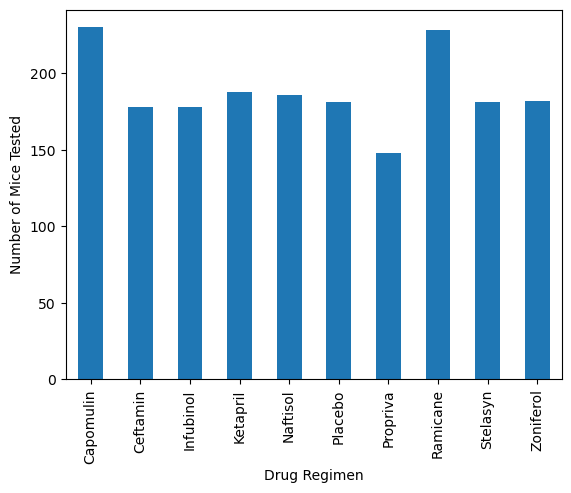

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_chart = clean_data.groupby('Drug Regimen')['Timepoint'].count()

pandas_bar_chart.plot(kind='bar',
              xlabel='Drug Regimen',
              ylabel='Number of Mice Tested')

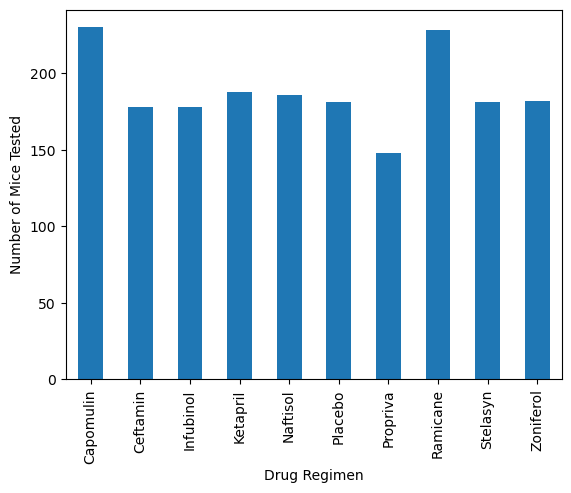

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
clean_data.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar')

#Add axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

#Show Plot
plt.show()

<AxesSubplot:ylabel='Sex'>

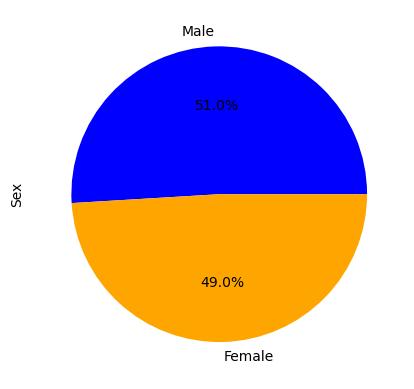

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_sex_data = clean_data['Sex'].value_counts()
pandas_sex_data

# Create Pie Chart
pandas_sex_data.plot.pie(autopct='%1.1f%%', labels=["Male","Female"], colors=["Blue","Orange"])

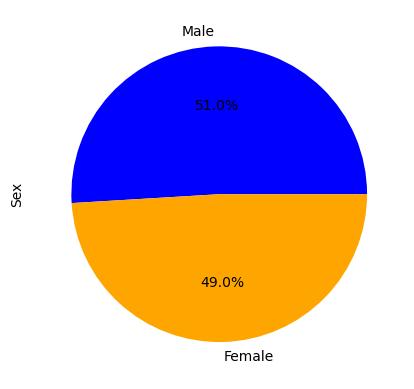

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_sex_data = clean_data['Sex'].value_counts()
pyplot_sex_data

labels = ["Male","Female"]
colors = ["Blue","Orange"]

plt.pie(pyplot_sex_data, autopct='%1.1f%%', labels=labels, colors=colors)

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
grouped_data = clean_data.groupby('Mouse ID')
timepoint_clean_data = grouped_data.apply(lambda x: x[x.Timepoint == x.Timepoint.max()])
timepoint_clean_data
consolidated_clean_data = timepoint_clean_data[(timepoint_clean_data['Drug Regimen'].isin(["Capomulin",
                                                                                            "Ramicane",
                                                                                            "Infubinol",
                                                                                            "Ceftamin"]))]
consolidated_clean_data

,,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
Mouse ID,,,,,,,,,,
a203,1804,a203,Infubinol,Female,20,23,45,67.973419,2,False
a251,1786,a251,Infubinol,Female,21,25,45,65.525743,1,False
a275,1856,a275,Ceftamin,Female,20,28,45,62.999356,3,False
a411,1773,a411,Ramicane,Male,3,22,45,38.407618,1,False
a444,1836,a444,Ramicane,Female,10,25,45,43.047543,0,False
...,...,...,...,...,...,...,...,...,...,...
y769,1767,y769,Ceftamin,Female,6,27,45,68.594745,4,False
y793,1797,y793,Capomulin,Male,17,17,45,31.896238,2,False
y865,1766,y865,Ceftamin,Male,23,26,45,64.729837,3,False


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment, group in consolidated_clean_data.groupby('Drug Regimen'):
    q1 = group['Tumor Volume (mm3)'].quantile(0.25)
    q3 = group['Tumor Volume (mm3)'].quantile(0.75)
    
    # add subset
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = group[(group['Tumor Volume (mm3)'] < lower_bound) | (group['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Potential Outliers for {treatment}:")
    print(f"Outliers: {outliers['Tumor Volume (mm3)'].values}")

Potential Outliers for Capomulin:
Outliers: []
Potential Outliers for Ceftamin:
Outliers: []
Potential Outliers for Infubinol:
Outliers: [36.3213458]
Potential Outliers for Ramicane:
Outliers: []


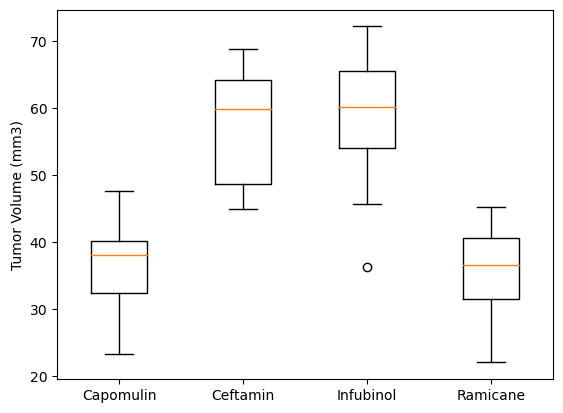

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
Tumor_Vol_Data = []
for treatment, group in consolidated_clean_data.groupby('Drug Regimen'):
    if treatment in treatments:
        Tumor_Vol_Data.append(group['Tumor Volume (mm3)'].values)
fig, ax = plt.subplots()
ax.boxplot(Tumor_Vol_Data, labels=treatments)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

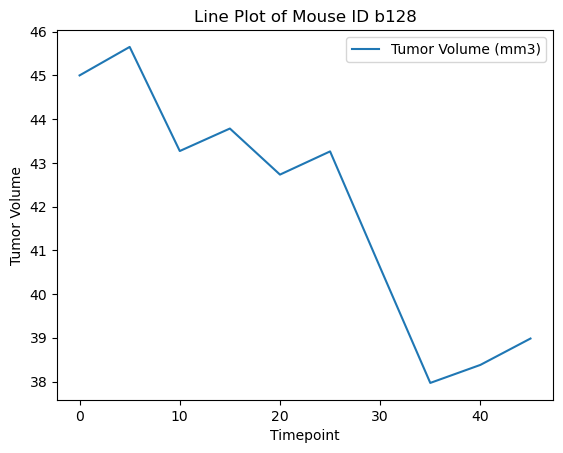

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_clean_data = clean_data[clean_data['Mouse ID'] == "b128"]
capomulin_clean_data
capomulin_clean_data.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.title('Line Plot of Mouse ID b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

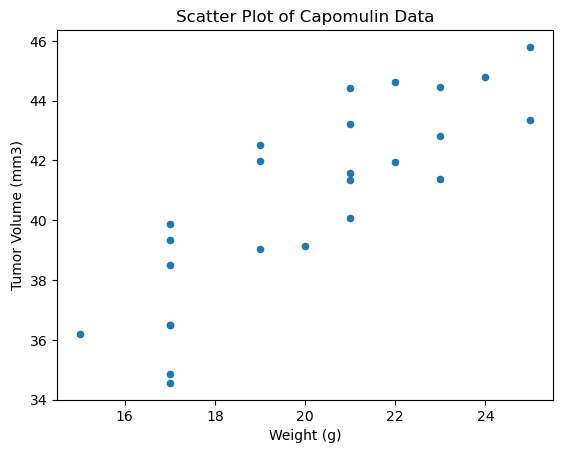

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin2_clean_data = clean_data[clean_data['Drug Regimen'] == "Capomulin"]
capomulin3_clean_data = capomulin2_clean_data.groupby('Mouse ID').agg({'Weight (g)': ['mean'], 'Tumor Volume (mm3)': ['mean']})
capomulin3_clean_data
capomulin3_clean_data.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
plt.title('Scatter Plot of Capomulin Data')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


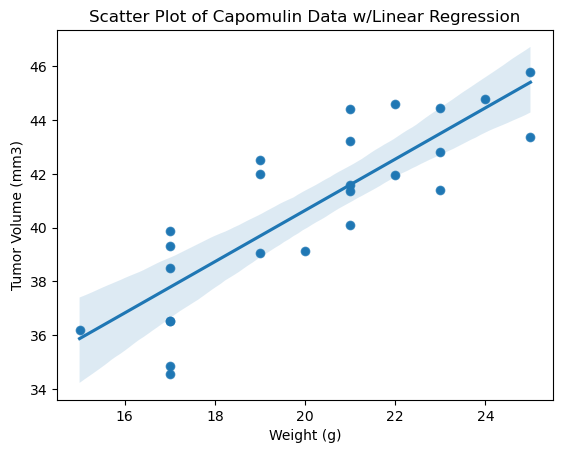

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import seaborn as sns
weight = capomulin3_clean_data.iloc[:,0]
tumor = capomulin3_clean_data.iloc[:,1]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
capomulin3_clean_data.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', data=capomulin3_clean_data)
plt.title('Scatter Plot of Capomulin Data w/Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()